In [5]:
pip install yfinance requests beautifulsoup4 matplotlib pandas


Note: you may need to restart the kernel to use updated packages.


In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup


In [7]:
import yfinance as yf

# Download Tesla stock data
tesla_data = yf.download("TSLA")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())

[*********************100%***********************]  1 of 1 completed

Empty DataFrame
Columns: [(Date, ), (Adj Close, TSLA), (Close, TSLA), (High, TSLA), (Low, TSLA), (Open, TSLA), (Volume, TSLA)]
Index: []


In [8]:
import yfinance as yf
import pandas as pd

# Get Tesla stock data
tesla = yf.Ticker("TSLA")

# Fetch quarterly financials (since annual data might be missing)
income_statement = tesla.quarterly_financials

# Print available rows to check column names
print("Available Rows:\n", income_statement.index)

# Extract revenue data if available
if "TotalRevenue" in income_statement.index:
    tesla_revenue = income_statement.loc["TotalRevenue"]
    tesla_revenue_df = pd.DataFrame(tesla_revenue).reset_index()
    tesla_revenue_df.columns = ["Date", "Revenue"]
    print(tesla_revenue_df)
else:
    print("❌ Revenue data not found!")


Available Rows:
 RangeIndex(start=0, stop=0, step=1)
❌ Revenue data not found!


In [9]:
import yfinance as yf

# Download GME stock data
gme_data = yf.download("GME", start="2020-01-01", end="2024-04-01")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first 5 rows
print(gme_data.head())


[*********************100%***********************]  1 of 1 completed

Empty DataFrame
Columns: [(Date, ), (Adj Close, GME), (Close, GME), (High, GME), (Low, GME), (Open, GME), (Volume, GME)]
Index: []


In [10]:
import pandas as pd
import requests
import yfinance as yf

# Fetch financial data from Yahoo Finance
ticker = "GME"  # Change this to your stock symbol
gme = yf.Ticker(ticker)

# Try fetching annual and quarterly financials
gme_financials = gme.financials
gme_quarterly_financials = gme.quarterly_financials

if not gme_financials.empty:
    financial_data = gme_financials
    print("Using Annual Financials")
elif not gme_quarterly_financials.empty:
    financial_data = gme_quarterly_financials
    print("Using Quarterly Financials")
else:
    financial_data = None
    print("No financial data available.")

if financial_data is not None:
    print("\nAvailable financial keys:", financial_data.index)

    # Check for revenue-related data
    revenue_key = next((key for key in financial_data.index if "Revenue" in key), None)
    if revenue_key:
        total_revenue = financial_data.loc[revenue_key]
        print(f"\n{revenue_key}:")
        print(total_revenue)
    else:
        print("\nRevenue data not found.")

# Fetch an HTML table from a real website
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"  # Replace with a valid URL
headers = {"User-Agent": "Mozilla/5.0"}

try:
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Raise an error for bad responses
    tables = pd.read_html(response.text)

    # Print all tables for inspection
    for idx, table in enumerate(tables):
        print(f"\nTable {idx}:\n", table.head())

except requests.exceptions.RequestException as e:
    print("\nError fetching the webpage:", e)


No financial data available.

Table 0:
    GameStop Annual Revenue (Millions of US $)  \
0                                        2024   
1                                        2023   
2                                        2022   
3                                        2021   
4                                        2020   

  GameStop Annual Revenue (Millions of US $).1  
0                                       $5,273  
1                                       $5,927  
2                                       $6,011  
3                                       $5,090  
4                                       $6,466  

Table 1:
   GameStop Quarterly Revenue (Millions of US $)  \
0                                    2024-10-31   
1                                    2024-07-31   
2                                    2024-04-30   
3                                    2024-01-31   
4                                    2023-10-31   

  GameStop Quarterly Revenue (Millions of US $).1  
0

<ipython-input-10-83be46dc8b91>:42: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/us

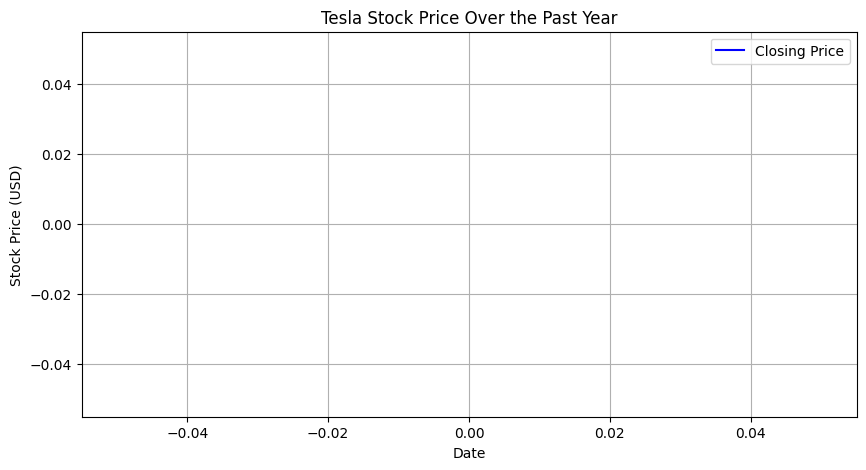

In [11]:
import yfinance as yf
import matplotlib.pyplot as plt

# Function to plot stock data
def make_graph(stock_data, title="Stock Price Over Time"):
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data.index, stock_data["Close"], label="Closing Price", color="blue")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Fetch Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_history = tesla.history(period="1y")  # Fetch past 1 year of data

# Plot Tesla stock data
make_graph(tesla_history, title="Tesla Stock Price Over the Past Year")


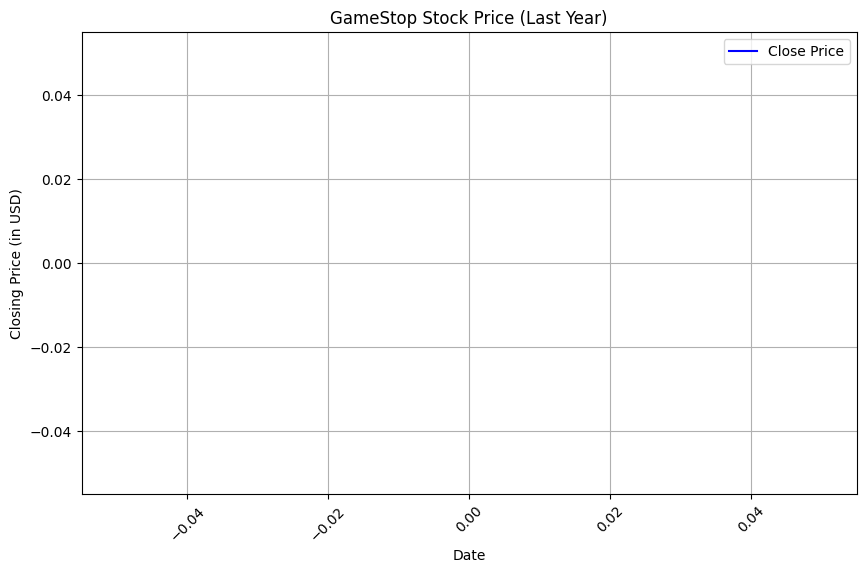

In [13]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(data, title):
    # Plotting the closing price of the stock data
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (in USD)')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# Fetch GameStop stock data for the past year
gme = yf.Ticker("GME")
gme_data = gme.history(period="1y")

# Use make_graph to plot the data
make_graph(gme_data, "GameStop Stock Price (Last Year)")
